<a href="https://www.kaggle.com/code/tanbeerjubaer/pytorch-fundamentals?scriptVersionId=148213787" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import torch
print(torch.__version__)

2.0.0


In [4]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [5]:
type(scalar)

torch.Tensor

In [6]:
scalar.ndim

0

In [7]:
scalar.item()

7

In [8]:
# vector
vector = torch.tensor([2,4])
vector

tensor([2, 4])

In [9]:
vector.shape, vector.ndim

(torch.Size([2]), 1)

In [10]:
# Matrix
matrix = torch.tensor([[1,2,3],
                      [2,3,4]])
matrix

tensor([[1, 2, 3],
        [2, 3, 4]])

In [11]:
matrix.ndim

2

In [12]:
matrix.shape

torch.Size([2, 3])

In [13]:
# Tensors
tensor  = torch.tensor([[[1,2, 3],
                         [2, 3, 4],
                         [4,5, 6]], [[2,3,3],
                                     [3,4,3],
                                    [4,5,4]]])
tensor

tensor([[[1, 2, 3],
         [2, 3, 4],
         [4, 5, 6]],

        [[2, 3, 3],
         [3, 4, 3],
         [4, 5, 4]]])

In [14]:
tensor.ndim, tensor.shape

(3, torch.Size([2, 3, 3]))

In [15]:
tensor[1]

tensor([[2, 3, 3],
        [3, 4, 3],
        [4, 5, 4]])

In [16]:
# Create a random tensor of size (3, 4)
random_tensor = torch.randint(low=1, high=11, size=(4, 4), dtype=torch.int32)
random_tensor

tensor([[ 4, 10,  1,  1],
        [ 2,  1,  6,  3],
        [ 1,  8,  3,  9],
        [ 1,  1,  4,  4]], dtype=torch.int32)

In [17]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [18]:
random_image_size_tensor[0].shape

torch.Size([224, 3])

In [19]:
zeros = torch.zeros(size=(2,3))
zeros.shape

torch.Size([2, 3])

In [20]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

In [21]:
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=-1, end=10, step=1)
zero_to_ten

tensor([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [22]:
ten_zeros = torch.zeros_like(zero_to_ten)
ten_zeros, ten_zeros.device

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), device(type='cpu'))

In [23]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

In [24]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16) # torch.half would also work

float_16_tensor.dtype, float_16_tensor.device

(torch.float16, device(type='cpu'))

In [25]:
# Create a tensor
some_tensor = torch.rand(2, 3)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.0989, 0.4808, 0.2364],
        [0.7811, 0.2145, 0.8712]])
Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [26]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])

In [27]:
tensor1 + tensor2

tensor([5, 7, 9])

In [28]:
torch.multiply(tensor1, tensor2)

tensor([ 4, 10, 18])

In [29]:
tensor1*tensor1

tensor([1, 4, 9])

In [30]:
tensor1.shape

torch.Size([3])

In [31]:
torch.matmul(tensor1, tensor2.T)

/tmp/ipykernel_32/1919543094.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3571.)
  torch.matmul(tensor1, tensor2.T)


tensor(32)

In [32]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

torch.mm(tensor_A, tensor_B.T).shape

torch.Size([3, 3])

In [33]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input 
                         out_features=6) # out_features = describes outer value 
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [34]:
# create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [35]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
print(f"Mean: {x.type(torch.float32).mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Mean: 45.0
Sum: 450


In [36]:
torch.argmax(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(9), tensor(0), tensor(45.), tensor(450))

In [37]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [38]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

In [39]:
x = torch.arange(1., 8.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]))

In [40]:
x_rs = x.reshape(1, 7)
x_rs

tensor([[1., 2., 3., 4., 5., 6., 7.]])

In [41]:
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [42]:
z[:, 0] = 71
z

tensor([[71.,  2.,  3.,  4.,  5.,  6.,  7.]])

In [43]:
x_stk = torch.stack([x,x,x], dim=0)
x_stk

tensor([[71.,  2.,  3.,  4.,  5.,  6.,  7.],
        [71.,  2.,  3.,  4.,  5.,  6.,  7.],
        [71.,  2.,  3.,  4.,  5.,  6.,  7.]])

In [44]:
print(f"Previous tensor: {x_rs}")
print(f"Previous shape: {x_rs.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_rs.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[71.,  2.,  3.,  4.,  5.,  6.,  7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([71.,  2.,  3.,  4.,  5.,  6.,  7.])
New shape: torch.Size([7])


In [45]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=1)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([71.,  2.,  3.,  4.,  5.,  6.,  7.])
Previous shape: torch.Size([7])

New tensor: tensor([[71.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.]])
New shape: torch.Size([7, 1])


In [46]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [47]:
# create a tensor
x = torch.arange(10, 100, 5).reshape(2, 3, 3)
x

tensor([[[10, 15, 20],
         [25, 30, 35],
         [40, 45, 50]],

        [[55, 60, 65],
         [70, 75, 80],
         [85, 90, 95]]])

In [48]:
x[0, 1, 2]

tensor(35)

In [49]:
x, x.ndim

(tensor([[[10, 15, 20],
          [25, 30, 35],
          [40, 45, 50]],
 
         [[55, 60, 65],
          [70, 75, 80],
          [85, 90, 95]]]),
 3)

In [50]:
x[0:, 1, :]

tensor([[25, 30, 35],
        [70, 75, 80]])

In [51]:
# Get all values of 0th dimension and the 0 index of 1st dimension
x[:, :, 0]

tensor([[10, 25, 40],
        [55, 70, 85]])

In [52]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[15, 30, 45],
        [60, 75, 90]])

In [53]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
x[:, 1, 1]

tensor([30, 75])

In [54]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension 
x[0, 0, :] # same as x[0][0]

tensor([10, 15, 20])

In [55]:
arr = np.arange(1.0, 8.0)
tensor = torch.from_numpy(arr).type(torch.float32)
arr, tensor

(array([1., 2., 3., 4., 5., 6., 7.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [56]:
arr+1, tensor

(array([2., 3., 4., 5., 6., 7., 8.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [57]:
tensor = torch.ones(7)
arr = tensor.numpy()
arr, tensor

(array([1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 tensor([1., 1., 1., 1., 1., 1., 1.]))

In [58]:
tensor = tensor + 1
tensor, arr

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [59]:
torch.manual_seed(42)
# np.random.seed(42)
# Create two random tensors
random_tensor_A = torch.rand(3, 4)

torch.manual_seed(42)
# np.random.seed(42)
random_tensor_B = torch.rand(3, 4)


print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor B:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [60]:
!nvidia-smi

Fri Oct 27 08:55:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [61]:
torch.cuda.is_available()

True

In [62]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [63]:
torch.cuda.device_count()

2

In [64]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

In [65]:
tensor = torch.tensor([1,2,3])
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [66]:
tensor_gpu = tensor.to(device)
tensor, tensor_gpu.device

(tensor([1, 2, 3]), device(type='cuda', index=0))

In [67]:
tensor_gpu.cpu().numpy()

array([1, 2, 3])

In [68]:
tensor_gpu

tensor([1, 2, 3], device='cuda:0')

In [69]:
xarr = torch.arange(1, 11, 1)
xgpu = xarr.to(device)

In [70]:
xnp = xgpu.cpu().numpy()
xnp, xgpu

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], device='cuda:0'))

In [71]:
xgpu[3]

tensor(4, device='cuda:0')

<div style="text-align:center; background-color:#4CAF50; padding:40px; border-radius:20px;">
    <h1 style="color:white; font-family: Arial, sans-serif; font-size:36px; margin:0;">PyTorch Workflow Fundamentals</h1>
</div>


In [72]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [73]:
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [74]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0'

In [75]:
# Create Known Parameters
weight = 0.7
bias = .3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=72)
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [77]:
X_train[:4], y_train[:4]

(tensor([[0.6200],
         [0.2600],
         [0.3600],
         [0.7600]]),
 tensor([[0.7340],
         [0.4820],
         [0.5520],
         [0.8320]]))

In [130]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=20, marker='o', label="Training data")
  
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=20, marker = '*', label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=40, marker = 'x', label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 12});

In [131]:
r = torch.randn(1,3, dtype=torch.float32, requires_grad=True)
r

tensor([[0.3367, 0.1288, 0.2345]], requires_grad=True)

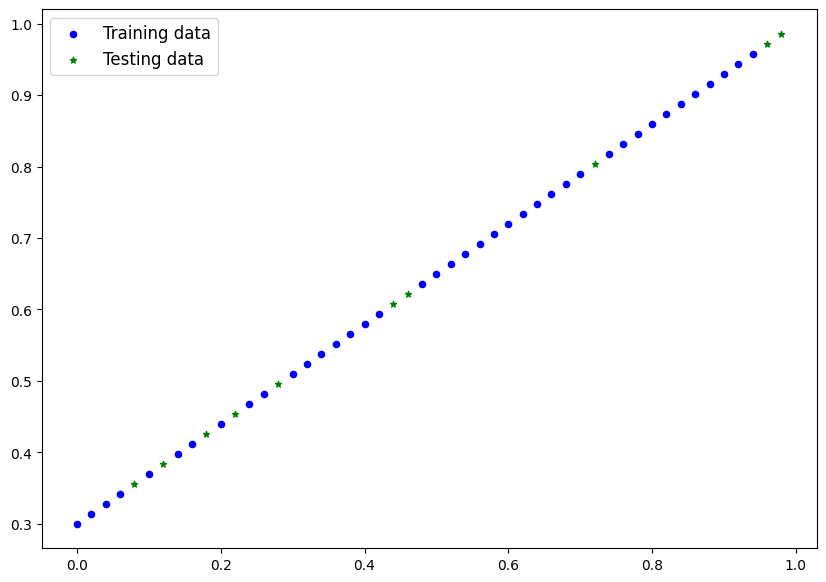

In [80]:
plot_predictions()

In [81]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        print('Model is Initialized',end=' ')
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [121]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

Model is Initialized 

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [83]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [84]:
X_test

tensor([[0.9600],
        [0.4400],
        [0.0800],
        [0.2200],
        [0.9800],
        [0.1200],
        [0.1800],
        [0.4600],
        [0.7200],
        [0.2800]])

In [85]:
# Make prediction using model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [86]:
y_preds

tensor([[0.4520],
        [0.2770],
        [0.1557],
        [0.2029],
        [0.4588],
        [0.1692],
        [0.1894],
        [0.2837],
        [0.3712],
        [0.2231]])

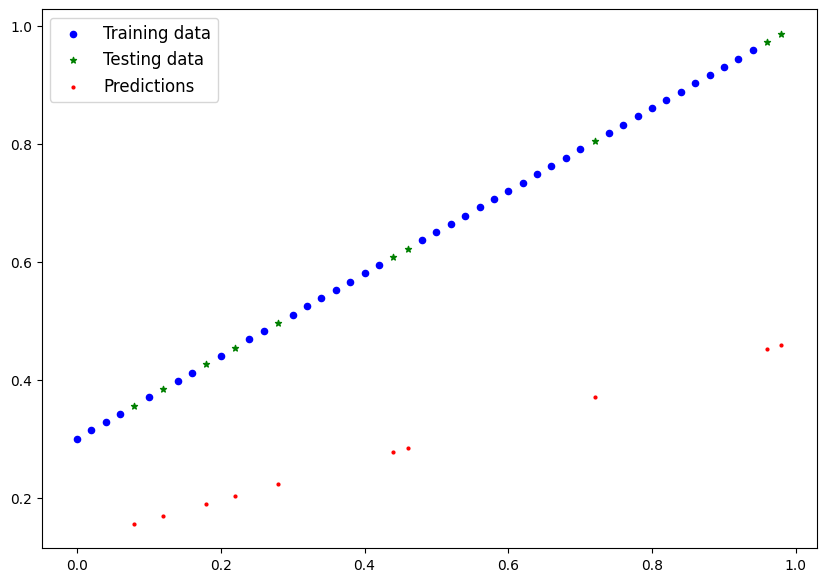

In [87]:
plot_predictions(predictions=y_preds)

In [122]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [123]:
# Create a loss function
loss_fn = nn.L1Loss()

# create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

In [114]:
y_test.dtype

torch.float32

In [124]:
torch.manual_seed(42)
epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
    # Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()
    
    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
#     print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)
    
    # 3. Zero grad the Optimizer
    optimizer.zero_grad()
    
    
    # 4. Loss Backwards
    loss.backward()
    
    # 5. Progress the optimizer
    optimizer.step()
    
    
    ## Testing
    
    # Put the model in evaluation mode
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass on test data
        y_test_pred = model_0(X_test)
        
        # Calculate the loss on the test data
        test_loss = loss_fn(y_test_pred, y_test.type(torch.float))
        
        # Print out what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
  

Epoch: 0 | MAE Train Loss: 0.3533903956413269 | MAE Test Loss: 0.32027342915534973 
Epoch: 10 | MAE Train Loss: 0.22824016213417053 | MAE Test Loss: 0.19800682365894318 
Epoch: 20 | MAE Train Loss: 0.10970853269100189 | MAE Test Loss: 0.08399681001901627 
Epoch: 30 | MAE Train Loss: 0.05673975870013237 | MAE Test Loss: 0.05742837116122246 
Epoch: 40 | MAE Train Loss: 0.04468587785959244 | MAE Test Loss: 0.05533205345273018 
Epoch: 50 | MAE Train Loss: 0.0397898405790329 | MAE Test Loss: 0.051113106310367584 
Epoch: 60 | MAE Train Loss: 0.035385821014642715 | MAE Test Loss: 0.045489564538002014 
Epoch: 70 | MAE Train Loss: 0.03098180890083313 | MAE Test Loss: 0.03986600786447525 
Epoch: 80 | MAE Train Loss: 0.026577791199088097 | MAE Test Loss: 0.03424246236681938 
Epoch: 90 | MAE Train Loss: 0.022173773497343063 | MAE Test Loss: 0.028618913143873215 
Epoch: 100 | MAE Train Loss: 0.017773259431123734 | MAE Test Loss: 0.02282087504863739 
Epoch: 110 | MAE Train Loss: 0.013372739776968956

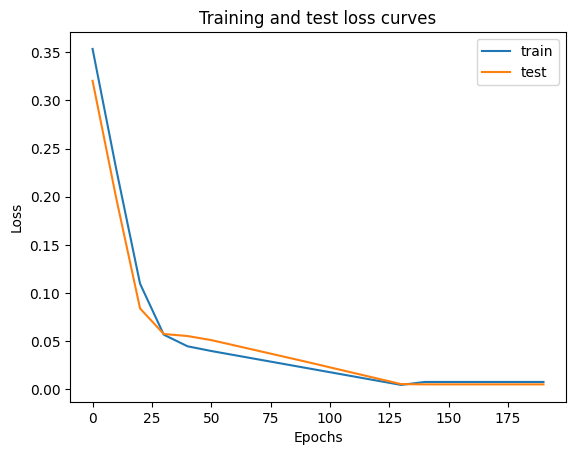

In [125]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label='train')
plt.plot(epoch_count, test_loss_values, label='test')
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
# plt.ylim([0, 0.3])
plt.legend()
plt.show();

In [126]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6901])), ('bias', tensor([0.2973]))])

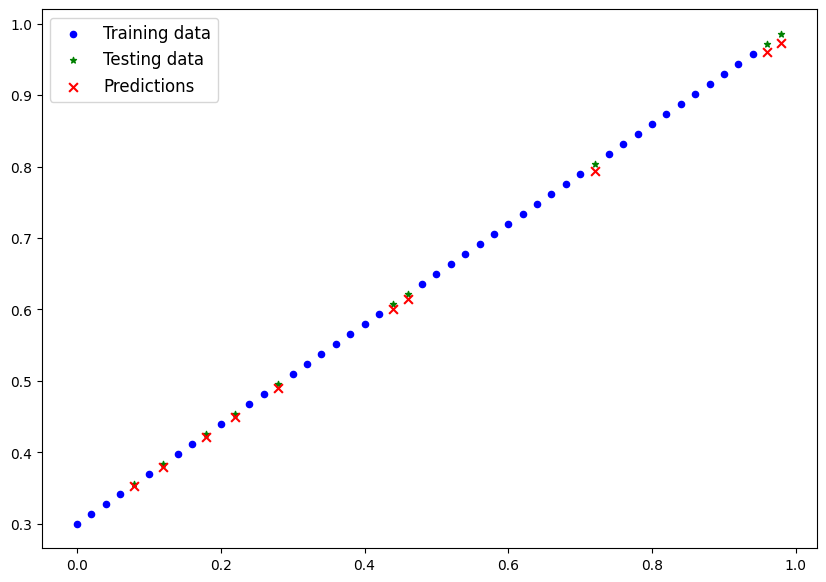

In [132]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [147]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
#     model_0.to(device)
#     X_test = X_test.to(device)
    y_preds = model_0(X_test)
y_preds

tensor([[0.9598],
        [0.6010],
        [0.3525],
        [0.4491],
        [0.9736],
        [0.3801],
        [0.4215],
        [0.6148],
        [0.7942],
        [0.4905]])

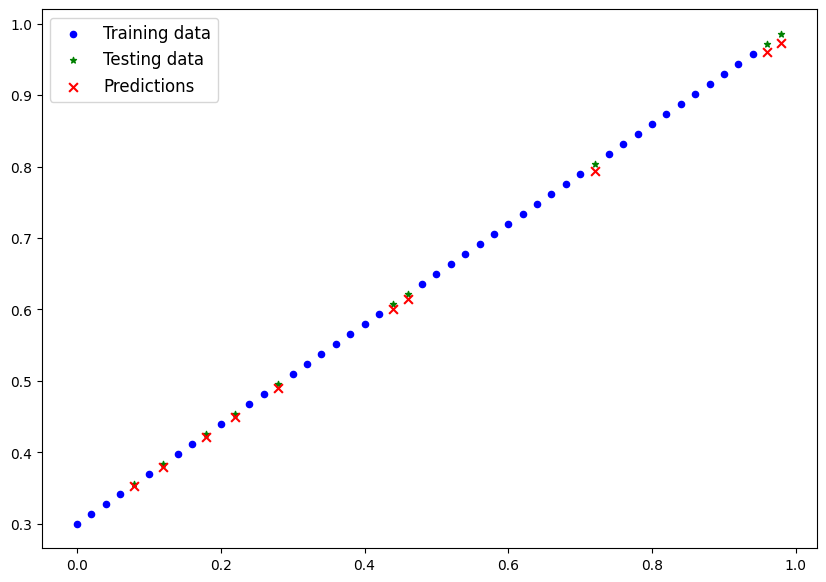

In [148]:
plot_predictions(predictions=y_preds)

In [149]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)
# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

models/01_pytorch_workflow_model_0.pth
Saving model to: models/01_pytorch_workflow_model_0.pth


In [154]:
! ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1207 Oct 27 10:03 models/01_pytorch_workflow_model_0.pth


In [155]:
! mkdir New_Folder


    
## 6. Putting it all together


In [157]:
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

Model is Initialized 

<All keys matched successfully>

In [158]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.6901])), ('bias', tensor([0.2973]))])

In [159]:
# 1. Put the loaded model into evaluation mode
model_1.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = model_1(X_test) # perform a forward pass on the test data with the loaded model

In [160]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [161]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [226]:
# Create weight and bias
weight = 0.3
bias = 0.9

# Create range values
start = 0
end = 2
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=72)
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [232]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(15, 6))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=20, marker='o', label="Training data")
  
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=20, marker = '*', label="Testing data")

    if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=40, marker = 'x', label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 12});

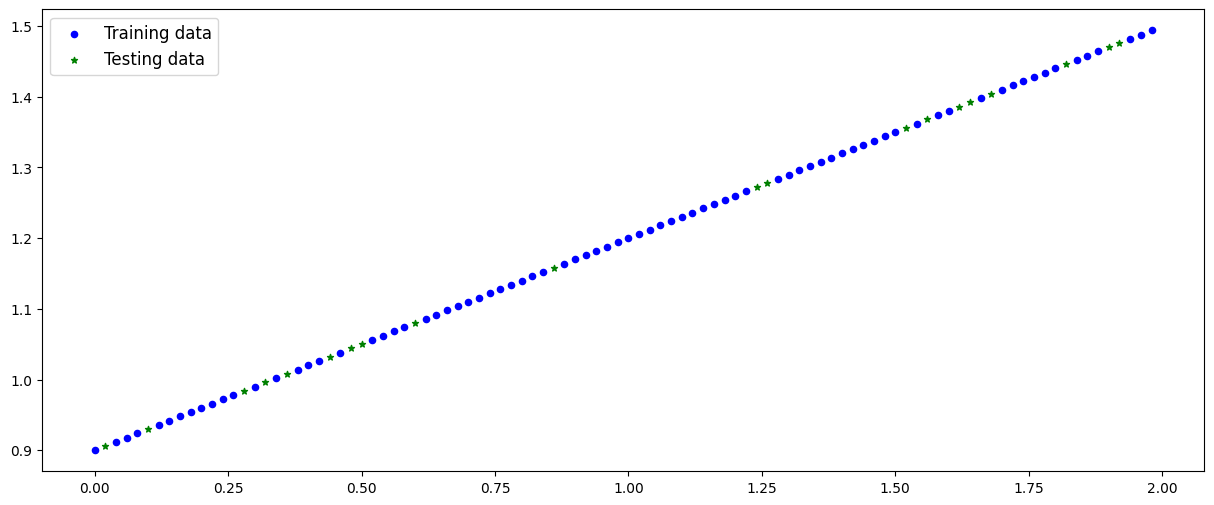

In [233]:
plot_predictions()

In [234]:
# Subclass nn.module to make our model

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        # use nn.Linear() for creating models parameters 
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [235]:
next(model_1.parameters()).device

device(type='cpu')

In [236]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [237]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [238]:
from tqdm import tqdm

In [239]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in tqdm(range(epochs)):
    
    ## Training
    
    model_1.train()
    
    # Forward Pass
    y_pred = model_1(X_train)
    
    # Calculate Loss
    loss = loss_fn(y_pred, y_train)
    
    # Zero grad optimizer
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    ## testing
    
    model_1.eval()
    
    # Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 100 == 0:
        print(f'Epochs: {epoch} | Train loss : {loss} | Test loss : {test_loss}')
    
print('---------Ended----------')
    
    

 30%|██▉       | 297/1000 [00:00<00:00, 1482.37it/s]

Epochs: 0 | Train loss : 0.3934318423271179 | Test loss : 0.38926613330841064
Epochs: 100 | Train loss : 0.02612397074699402 | Test loss : 0.030813155695796013
Epochs: 200 | Train loss : 0.010017498396337032 | Test loss : 0.009885924868285656


 45%|████▍     | 446/1000 [00:00<00:00, 1447.14it/s]

Epochs: 300 | Train loss : 0.010017498396337032 | Test loss : 0.009885924868285656
Epochs: 400 | Train loss : 0.010017498396337032 | Test loss : 0.009885924868285656
Epochs: 500 | Train loss : 0.010017498396337032 | Test loss : 0.009885924868285656


 74%|███████▍  | 740/1000 [00:00<00:00, 1412.43it/s]

Epochs: 600 | Train loss : 0.010017498396337032 | Test loss : 0.009885924868285656
Epochs: 700 | Train loss : 0.010017498396337032 | Test loss : 0.009885924868285656
Epochs: 800 | Train loss : 0.010017498396337032 | Test loss : 0.009885924868285656


100%|██████████| 1000/1000 [00:00<00:00, 1406.26it/s]

Epochs: 900 | Train loss : 0.010017498396337032 | Test loss : 0.009885924868285656
---------Ended----------


In [240]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2992]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8908], device='cuda:0'))])

In [241]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.2992]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8908], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [242]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.3456],
        [1.3815],
        [1.1481],
        [0.9865],
        [1.3934],
        [1.4593],
        [1.3575],
        [1.4353],
        [1.0703],
        [1.0224],
        [0.8967],
        [1.4652],
        [1.0404],
        [1.3755],
        [1.2618],
        [0.9207],
        [0.9985],
        [1.2678],
        [0.9745],
        [1.0344]], device='cuda:0')

In [243]:
y_test

tensor([[1.3560],
        [1.3920],
        [1.1580],
        [0.9960],
        [1.4040],
        [1.4700],
        [1.3680],
        [1.4460],
        [1.0800],
        [1.0320],
        [0.9060],
        [1.4760],
        [1.0500],
        [1.3860],
        [1.2720],
        [0.9300],
        [1.0080],
        [1.2780],
        [0.9840],
        [1.0440]], device='cuda:0')

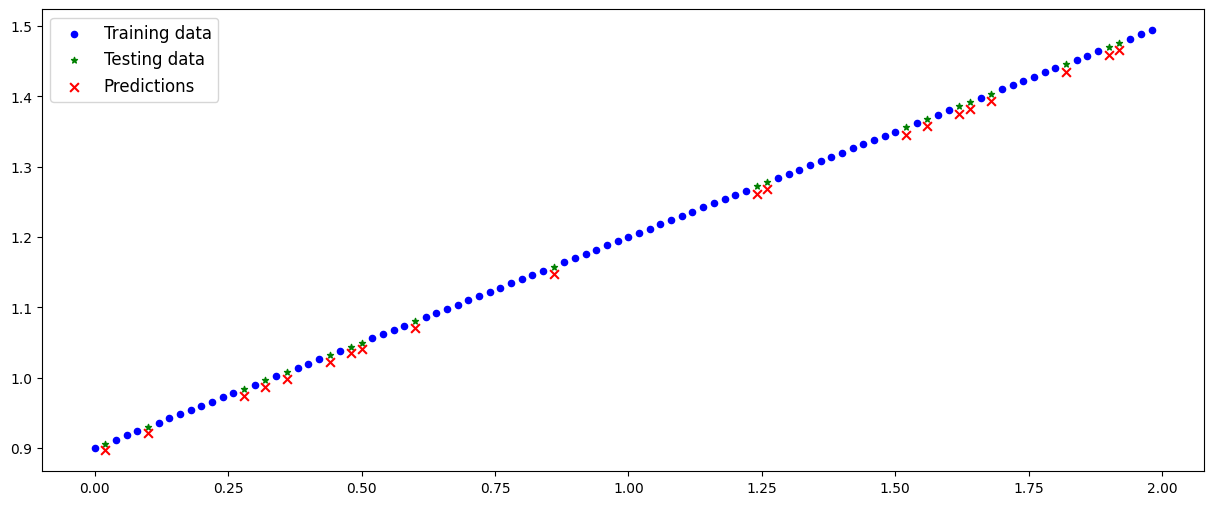

In [244]:
plot_predictions(predictions=y_preds.cpu())

In [245]:
# plot_predictions(train_data=X_train.cpu(), test_data=X_test.cpu(), train_labels=y_train.cpu(), test_labels=y_test.cpu(),  predictions=y_preds.cpu())

In [220]:
MODEL_NAME

'01_pytorch_workflow_model_0.pth'

In [246]:
model_name = '01_pytorch_workflow_model_2.pth'
model_save_path = MODEL_PATH / model_name

print(f"Saving model to: {model_save_path}")
torch.save(obj=model_1.state_dict(),
            f = model_save_path)

Saving model to: models/01_pytorch_workflow_model_2.pth


In [247]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(model_save_path))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [248]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')